In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as ss
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
# set some styling defaults for matplotlib
plt.style.use("seaborn-talk")
mpl.rcParams["figure.dpi"] = 90  # change this to set apparent figure size
mpl.rcParams["figure.figsize"] = (10, 4)
mpl.rcParams["figure.frameon"] = False

# set decimal precision to 3 dec. places
%precision 3



'%.3f'

## Part I: baseline

## Part 2: Bayesian optimisation

## Part III: Prediction and display

### Data generating process

We have a data generating process for the thermometer. We can both sample from it, and compute the likelihood of observations. 

The following functions take these parameters:
* `real_temp` the real temperature at the probe location [unknown]
* `init_temp` room temperature (assumed known=20)
* `watch_time` the time since the probe was inserted (known)
* `k` the smoothing of the temperature sensor [known]



In [2]:
from temperature import noise_latency

def thermometer_sample(real_temp, init_temp, watch_time, k):
    noise_level, beta = noise_latency(k)    
    temp = real_temp + (init_temp - real_temp) * np.exp(-beta * watch_time)
    return temp + np.random.normal(0, noise_level, temp.shape)

def thermometer_llik(real_temp, init_temp, watch_time, k, t):
    noise_level, beta = noise_latency(k)    
    temp = real_temp + (init_temp - real_temp) * np.exp(-beta * watch_time)
    return ss.norm(temp, noise_level).logpdf(t)

thermometer_llik(200, 20, 5, 10, 120)


-8.572

We can also simulate the cooking of the food, and the (true) temperature at different depths. This is deterministic in our model, so we don't have a likelihood or a sampling function; it's just a function we could plug together with the functions above.

In [ ]:
from temperature import get_mass

def food_sample(radius, insertion_depth, init_temp, cooking_temp, cooking_time):
        mass = get_mass(radius, 1.0)
        heat_capacity = 0.1
        alpha = 1.0/((np.sqrt(mass)  * heat_capacity) * (abs(insertion_depth)+radius/2)+1+np.random.normal(0, 0.001))            
        temp = cooking_temp + (init_temp - cooking_temp) * np.exp(-alpha * cooking_time)
        
        temp = np.tanh(temp/120) * 120
        return temp


In [5]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from temperature import create_game_ui
create_game_ui(5.0)

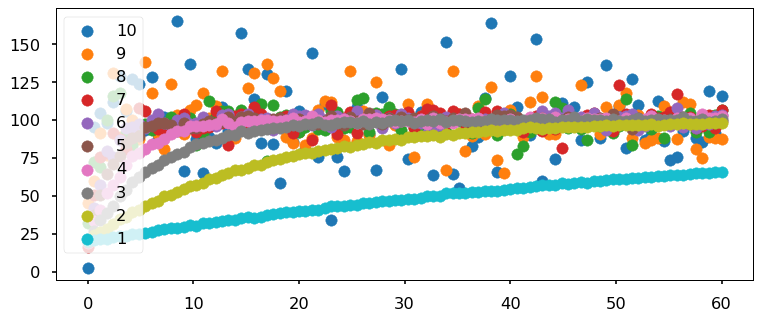

In [13]:
from temperature import thermometer, food_model, meat_temps



watch_time = np.linspace(0, 1.0, 100)
fig, ax = plt.subplots()
for k in [10,9,8,7,6,5,4,3,2,1]:
    noise, beta = noise_latency(k)
    temps = thermometer(100, 20, watch_time, noise_level=noise, beta=beta)
    ax.scatter(watch_time*60, temps, label=str(k))
ax.legend()

In [2]:
def game():
    chilled = random.choice(["room temperature", "chilled", "frozen"])
    init_temps = {"room temperature":20, "chilled":4, "frozen":-27}
    init_temp = init_temps[chilled]
    density = 0.9
    heat_capacity = 0.01
    oven_temp = np.random.randint(0, 5) * 10 + 150
    meat = random.choice(list(meat_temps.keys()))
    mass = get_mass(radius, density)
    print(f"You are cooking {mass/1000:.1f}kg of {meat} in an oven at {oven_temp}C")
    for i in range(100):
        print(f"Time = {i} minutes")
        t = thermometer_model(radius, radius, room_temp, i, oven_temp, 1000.0, density, heat_capacity, 0.0)
        print(f"True internal temperature = {t:.0f}C")
        t = thermometer_model(radius, 0, room_temp, i, oven_temp, 1000.0, density, heat_capacity, 0.0)
        print(f"True surface temperature = {t:.0f}C")
        t = thermometer_model(radius, radius/2, room_temp, i, oven_temp, 0.5, density, heat_capacity, 0.1)
        print(f"Thermometer temperature at half-way = {t:.0f}C")
        
